<a href="https://colab.research.google.com/github/shaloy-lewis/EDA_on_play_store_app_reviews/blob/main/EDA_on_Play_Store_App_Reviews_by_Shaloy_Lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

* We are provided with two sets of .csv files which contains the datasets required to analyse the playstore app reviews. By analysing these two datasets, we must come up with the key factors that are responsible for app engagement and success.
* Let us start by analysing the 'play store data.csv' file.

In [1]:
# Importing the required libraries to read the csv files

import pandas as pd
import numpy as np

# **Exploring the playstoredata.csv file**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the csv file

play_store_data_path = '/content/drive/MyDrive/EDA on Play Store App Reviews - Shaloy Lewis/Play Store Data.csv'

ps_df = pd.read_csv(play_store_data_path)

In [4]:
# Basic inspection
# Viewing the top 10 rows of the imported dataframe

ps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
# Viewing the bottom 10 rows of the dataframe

ps_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
# Finding the number of rows and columns in the given dataset

ps_df.shape

(10841, 13)

Hence, we can say that there are a total of 10841 rows and 13 columns in this .csv file. Let us explore the columns, and the significance of the data it possesses.

In [7]:
# Columns of this dataset are

ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Let us first define what information the columns contain based on our inspection.**

* App: Contains the name of the app with a short description (optional).
* Category: It gives the category to the app.
* Rating: It contains the average rating the respective app received from its users.
* Reviews: It contains the number of users that have dropped a review for the respective app.
* Size: It contains the the disk space required to install the respective app.
* Installs: It gives the rounded figure of number of times the respective app was downloaded.
* Type: It states whether an app is free to use or paid.
* Price: It gives the price payable to install the app. For free type apps, the price is zero.
* Content rating: It states whether or not an app is suitable for all age groups or not.
* Genres: It gives the genre(s) to which the respective app belongs.
* Last updated: It gives the day in which the latest update was released.
* Current ver: It gives the current version of the respective app.
* Android ver: It gives the android version of the respective app.

# **Handling the errors and NaN values one column at a time.**

In [8]:
# First of all lets find the number of NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Let us try to handle these NaN values one column at a time.

Lets find the percentage of of rows that contain atleast one NaN value.

In [9]:
# Percentage of rows containing atleast one NaN value

total_nan = sum([True for id,row in ps_df.iterrows() if any(row.isnull())])

perc_nan = round(total_nan/10841*100, 2)

print(f'Hence, there are a total of {total_nan}({perc_nan}%) rows which contain atleast one NaN value.')

Hence, there are a total of 1481(13.66%) rows which contain atleast one NaN value.


Since approximately 13.66% of all the rows in the dataset contains atleast one NaN value, it is not practcal to eliminate all the rows containing NaN values. We need to handle this problem in another way.

Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.

**1. Android Ver: There are a total of 3 NaN values in this column.**

In [10]:
# The rows containing NaN values in the Android Ver column

ps_df[ps_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


* There are total of three entries with NaN in the 'Android Ver' column.
* There are a lot of errors the row corresponding to index number 10472. For example, the category contains the value '1.9', which does not make any sense, the rating is '19' which cannot be true, since the play store app reviews can be in between 1 and 5 only, and so on. So it is of our best interest to delete this row altogather so as to eliminate any errors as we proceed with the analysis.

In [11]:
# Dropping the row corresponding to index number 10472

ps_df.drop(10472, inplace= True)

In [12]:
# Shape of the updated dataframe

ps_df.shape

(10840, 13)

In [14]:
# Finding the different values the 'Android Ver' column takes

ps_df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
2.2 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since the remaining NaN values in the 'Android Ver' column cannot be replaced by any particular value, and, since there are only 2 more rows which contain NaN values in the 'Android Ver' column, which accounts to less than 0.02% of the total rows in the given dataset, it can be also be dropped.

In [15]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.

ps_df = ps_df[ps_df['Android Ver'].notna()]

In [16]:
# Shape of the updated dataframe

ps_df.shape

(10838, 13)

In [17]:
# NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

We were successfully able to handle the NaN values in the 'Android Ver' column.

**2. Current Ver: There are a total of 8 NaN values in this column.**

In [18]:
# The rows containing NaN values in the Current Ver column

ps_df[ps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [19]:
# Finding the different values the 'Current Ver' column takes

ps_df['Current Ver'].value_counts()

Varies with device      1459
1.0                      809
1.1                      263
1.2                      178
2.0                      151
                        ... 
1.60.0.31354-release       1
1.0.17.3905                1
1.24.09                    1
2.2.2.1                    1
5.600.49                   1
Name: Current Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the 'Current Ver' column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value which can replace it, it can be dropped.

In [20]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.

ps_df = ps_df[ps_df['Current Ver'].notna()]

In [21]:
# NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [22]:
# Shape of the updated dataframe

ps_df.shape

(10830, 13)

We were successfully able to handle the NaN values in the 'Current Ver' column.

**3. Type: There is only one NaN value in this column. Lets see whether or not we can handle this value.**

In [23]:
# The rows containing NaN values in the Current Ver column

ps_df[ps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [24]:
# Finding the different values the 'Type' column takes

ps_df['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

The 'Type' column contains only two entries, namely, 'Free' and 'Paid'. Also, if the app is of type-paid, the price of that app will be printed in the corresponding 'Price' column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with 'Free'.

In [25]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'

ps_df.loc[9148,'Type'] = 'Free'

In [26]:
# Finding the different values the 'Type' column takes

ps_df['Type'].value_counts()

Free    10033
Paid      797
Name: Type, dtype: int64

In [27]:
# NaN values in each column

ps_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [28]:
# Shape of the updated dataframe

ps_df.shape

(10830, 13)

We were successfully able to handle the NaN values in the 'Type' column.

**4. Rating: This column contains 1470 NaN values.**

In [30]:
# The rows containing NaN values in the Rating column

ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [31]:
ps_df[(ps_df['Rating'] <1) & (ps_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Since there are no such errors, we can proceed further.

In [32]:
ps_df.shape

(10830, 13)

* The 'Rating' column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis. 
* The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the 'Rating' column.

In [33]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),1)

median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating, median_rating]

[4.2, 4.3]

Lets visualize this with a boxplot and a distplot.

In [34]:
# Importing the required libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

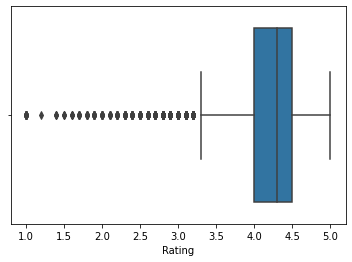

In [35]:
# Boxplot

sns.boxplot(data = ps_df['Rating'],x = ps_df['Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


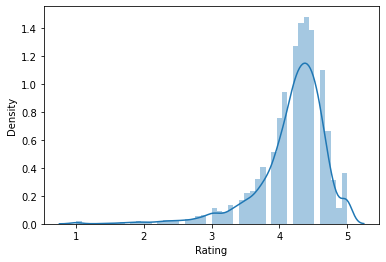

In [36]:
# Distplot

sns.distplot(ps_df['Rating'])

* The mean of the average ratings (excluding the NaN values) comes to be 4.2.
* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the boxplot and distplot visualizations, it is clear that the ratings are skewed to th right.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the 'Rating' column with its median.

In [37]:
# Replacing the NaN values in the 'Rating' colunm with its median value

ps_df['Rating'].fillna(value=median_rating, inplace=True)

In [38]:
# NaN values in each column

ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [39]:
# Cross checking the value of median in the 'Rating' column

ps_df['Rating'].median()

4.3

In [40]:
# Shape of the updated dataframe

ps_df.shape

(10830, 13)

The resultant number of rows after dropping the NaN values come out to be 10830.We have taken care of the NaN values in all columns.

# **Checking for errors and rectifing it one column at a time.**

In [41]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**1. Changing the datatype of the 'Last Updated' column from string to datetime.**

In [42]:
ps_df['Last Updated'].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
November 5, 2014        1
January 31, 2015        1
July 26, 2014           1
September 22, 2011      1
February 27, 2016       1
Name: Last Updated, Length: 1376, dtype: int64

In [43]:
# importing the datetime library

from datetime import datetime

In [44]:
# Trying the datetime.strptime function on a new dataframe to check for any errors.

new_df = ps_df['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
new_df

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10830, dtype: datetime64[ns]

In [45]:
# The datetime.strptime funtion applied to the main dataframe

ps_df['Last Updated'] = ps_df['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [46]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10830 non-null  object        
 1   Category        10830 non-null  object        
 2   Rating          10830 non-null  float64       
 3   Reviews         10830 non-null  object        
 4   Size            10830 non-null  object        
 5   Installs        10830 non-null  object        
 6   Type            10830 non-null  object        
 7   Price           10830 non-null  object        
 8   Content Rating  10830 non-null  object        
 9   Genres          10830 non-null  object        
 10  Last Updated    10830 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10830 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.5+ MB


**2. Handling the duplicates in the 'App' column**

In [47]:
ps_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
Candy Crush Saga                                     7
                                                    ..
Coupons.com – Grocery Coupons & Cash Back Savings    1
Al Quran Audio (Full 30 Juz)                         1
MYCU TX Mobile Banking                               1
EF Jumper                                            1
DT Manager                                           1
Name: App, Length: 9649, dtype: int64

In [48]:
# Inspecting the duplicates values.

ps_df[ps_df['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up


In [49]:
# Inspecting the duplicates values.

ps_df[ps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


Clearly, the there are duplicate values in the 'App' column. We must drop the duplicates to get more accurate data.

In [50]:
# dropping duplicates from the 'App' column.

ps_df.drop_duplicates(subset = 'App', inplace = True)

In [51]:
# Checking whether the duplicates in the 'App' column are taken care of or not.

ps_df['App'].value_counts()

Get Over Your Ex                                 1
DZ sim                                           1
Monster Ride Pro                                 1
Theme Android P Black design for LG V30          1
Golden Launcher                                  1
                                                ..
Updates for Samsung - Android Update Versions    1
DiskDigger photo recovery                        1
Offline Jízdní řády CG Transit                   1
Device Info Ex Live Wallpaper                    1
Listen and learn English in seven days           1
Name: App, Length: 9649, dtype: int64

In [52]:
# Checking the shape of the updated dataset

ps_df.shape

(9649, 13)

In [53]:
# Checking whether the duplicates are taken care of from the above examples

ps_df[ps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [54]:
# Checking whether the duplicates are taken care of from the above examples

ps_df[ps_df['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up


In [55]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


The resultant number of rows after dropping the duplicates in the app column come out to be 9649.

**3. Changing the datatype of the 'Price' column from string to float.**

In [56]:
ps_df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$3.95         1
$4.84         1
$299.99       1
$1.96         1
$2.95         1
Name: Price, Length: 92, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

In [57]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.

def drop_dollar(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [58]:
# test1

drop_dollar('$5.25443')

5.25443

In [59]:
# test2

drop_dollar('0')

0.0

In [60]:
# test1

drop_dollar('2.99')

2.99

The drop_dollar function worked fine on some of the examples above. Lets apply this function to convert the values in the 'Price' column from string datatype to float datatype.

In [61]:
# Trying the drop_dollar function on a new dataframe to check for any errors.

new_df1 = ps_df['Price'].apply(lambda x: drop_dollar(x))
new_df1 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9649, dtype: float64

In [62]:
# Checking values in the new_df1 dataframe

new_df1.value_counts()

0.00     8896
0.99      143
2.99      124
1.99       73
4.99       70
         ... 
1.59        1
46.99       1
19.90       1
28.99       1
1.04        1
Name: Price, Length: 92, dtype: int64

In [63]:
# The drop_dollar funtion applied to the main dataframe

ps_df['Price'] = ps_df['Price'].apply(lambda x: drop_dollar(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [64]:
ps_df[ps_df['Price'] != 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


In [65]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.0+ MB


We have successfully converted the datatype of values in the price column from string to float.

**4. Converting the values in the 'Installs' column from string datatype to integer datatype.**

In [66]:
# Checking the contents of the 'Installs' column

ps_df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

To convert all the values in the 'Installs' column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

In [67]:
# Creating a function drop_plus which dropps the '+' symbol if it is present and returns the output which is of integer datatype.

def drop_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [68]:
# test1

drop_plus('1,000+')

1000

In [69]:
# test2

drop_plus('0')

0

In [70]:
# test3

drop_plus('50,000,000+')

50000000

In [71]:
# test4

drop_plus('50+')

50

The drop_plus function worked fine on some of the examples above. Lets apply this function to convert the values in the 'Installs' column from string datatype to integer datatype.

In [72]:
# Trying the drop_plus function on a new dataframe to check for any errors.

new_df2 = ps_df['Installs'].apply(lambda x: drop_plus(x))
new_df2

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9649, dtype: int64

In [73]:
# Checking values in the new_df2 dataframe

new_df2.value_counts()

1000000       1416
100000        1112
10000         1029
10000000       937
1000           886
100            709
5000000        607
500000         504
50000          468
5000           467
10             384
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

Lets apply the drop_plus fnction to the 'Installs' column in the main dataframe.

In [74]:
# The drop_plus funtion applied to the main dataframe

ps_df['Installs'] = ps_df['Installs'].apply(lambda x: drop_plus(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [75]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


In [76]:
ps_df.shape

(9649, 13)

The resultant values are of the integer datatype, and it represents the least number of times a particular app has been installed.
* Installs = 0 indicates that that particular app has not been installed by anyone yet.
* Installs = 1 indicates that the particular app has been installed by atleast one user.
* Installs = 1000000 indicates that the particular app has been installed by atleast 1000000 users. So on and so forth.

**5. Converting the values in the 'Size' column from string datatype to float datatype.**

In [77]:
ps_df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
523k                     1
879k                     1
251k                     1
980k                     1
704k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the 'Size' column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [78]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [79]:
# test1

kb_to_mb('19M')

19.0

In [80]:
# test2

kb_to_mb('5k')

0.0049

In [81]:
# test3

kb_to_mb('Varies with device')

'Varies with device'

In [82]:
# test4

kb_to_mb('Money Heist')

'Money Heist'

The kb_to_mb function worked fine on some of the examples above. It is also able to handle errors if there are any. Lets apply this function to convert the values in the 'Size' column to a single unit (MB) and also convert them from string datatype to float datatype.

In [83]:
# Trying the kb_to_mb function on a new dataframe to check for any errors.

new_df3 = ps_df['Size'].apply(lambda x: kb_to_mb(x))
new_df3

0                        19
1                        14
2                       8.7
3                        25
4                       2.8
                ...        
10836                    53
10837                   3.6
10838                   9.5
10839    Varies with device
10840                    19
Name: Size, Length: 9649, dtype: object

In [84]:
# Checking the smallest value in the list

new_df3[new_df3 != 'Varies with device'].min()

0.0083

In [85]:
# Checking values in the new_df3 dataframe

new_df3.value_counts()

Varies with device    1227
12.0                   181
11.0                   181
13.0                   177
14.0                   176
                      ... 
0.0908                   1
0.2324                   1
0.0537                   1
0.499                    1
0.5137                   1
Name: Size, Length: 456, dtype: int64

Lets apply the kb_to_mb function on the 'Size' column of the main dataframe.

In [86]:
# The drop_plus funtion applied to the main dataframe

ps_df['Size'] = ps_df['Size'].apply(lambda x: kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [87]:
# Checking values in the size column of the updated dataframe

ps_df['Size'].value_counts()

Varies with device    1227
12.0                   181
11.0                   181
13.0                   177
14.0                   176
                      ... 
0.0908                   1
0.2324                   1
0.0537                   1
0.499                    1
0.5137                   1
Name: Size, Length: 456, dtype: int64

A vast majority of the entries in the 'Size' column contain the entry 'Varies with device'. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column.

In [88]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].max()

min_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(ps_df[ps_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

In [93]:
ps_df[ps_df['Size'] != 'Varies with device']['Size'].describe()

count     8422.0
unique     455.0
top         12.0
freq       181.0
Name: Size, dtype: float64

Lets visualize the data in the size column using the boxplot and distplot.

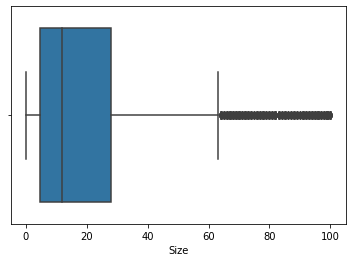

In [94]:
# Boxplot

sns.boxplot(data = ps_df[ps_df['Size'] != 'Varies with device']['Size'], x= ps_df[ps_df['Size'] != 'Varies with device']['Size'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


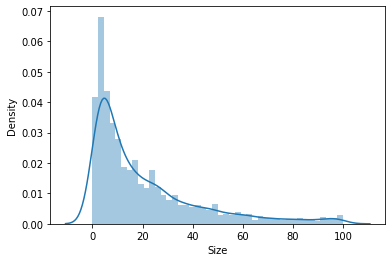

In [95]:
# Distplot

sns.distplot(ps_df[ps_df['Size'] != 'Varies with device']['Size'])

* It is clear from the visualizations that the data in the size column is skewed towards the left. 
* Also, we see that a vast majority of the entries in this column are of the value 'Varies with device', replacing this with any central tendency value (mean or median) may give incorrect visualizations. Hence these values are left as it is.

In [96]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


**6. Converting the datatype of reviews column from string to int.**

In [97]:
ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [98]:
ps_df.describe()

,Rating,Reviews,Installs,Price
count,9649.000000,9.649000e+03,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,7.785404e+06,1.100079
std,0.496528,1.832255e+06,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [99]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


**7. Checking the rest of the columns.**

In [100]:
# Genres

ps_df['Genres'].value_counts()

Tools                              824
Entertainment                      560
Education                          509
Business                           420
Medical                            395
                                  ... 
Trivia;Education                     1
Adventure;Education                  1
Casual;Music & Video                 1
Art & Design;Action & Adventure      1
Board;Pretend Play                   1
Name: Genres, Length: 118, dtype: int64

In [101]:
# Content rating

ps_df['Content Rating'].value_counts()

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [102]:
# Type

ps_df['Type'].value_counts()

Free    8896
Paid     753
Name: Type, dtype: int64

In [103]:
# Category

ps_df['Category'].value_counts()

FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [104]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


The columns analysed above seems to have no errors as such. Now that we have handled the errors and NaN values in the playstoredata.csv file, lets do the same for the userreviews.csv file.

# **Exploring userreviews.csv file**

In [105]:
user_reviews_data_path = '/content/drive/MyDrive/EDA on Play Store App Reviews - Shaloy Lewis/User Reviews.csv'

ur_df = pd.read_csv(user_reviews_data_path)

In [106]:
# Checking the top 10 rows of the data

ur_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [107]:
# Shape of the df

ur_df.shape

(64295, 5)

The dataframe contains 64295 rows of data.

In [108]:
# Columns in the df

ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [109]:
# Checking the values taken by the sentiment column

ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [110]:
# Inspecting the 

ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**Let us first define what information the columns contain based on our inspection.**

* App: Contains the name of the app with a short description (optional).
* Translated_Review: It contains the English translation of the review dropped by the user of the app.
* Sentiment: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* Sentiment_Polarity: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* Sentiment_Subjectivity: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.








# **Handling the errors and NaN values in the dataframe.**

In [111]:
# Finding the total no of NaN values in each column.

ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a lot of NaN values. We need to analyse these values and see how we can handle them.

In [112]:
# checking the NaN values in the translated rview column

ur_df[ur_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


There are a total of 26868 rows containing NaN values in the 'Translated_Review' column.

From this we can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns 'Sentiment', 'Sentiment_Polarity', and 'Sentiment_Subjectivity' in the majority of the cases.

Lets check if there are any exceptions.

In [113]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.

ur_df[ur_df['Translated_Review'].isnull() & ur_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity  of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [114]:
# Deleting the rows containing NaN values

ur_df = ur_df.dropna()

In [116]:
# The shape of the updated df

ur_df.shape

(37427, 5)

There are a total of 37427 rows in the updated df.

In [117]:
# Rechecking for any NaN values in the df

ur_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Hence we have taken care of all the NaN values in the df.

Lets go through each column and inspect it.

In [118]:
# Inspecting the sentiment column

ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [119]:
ur_df[ur_df['Sentiment'] == 'Negative'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [120]:
ur_df[ur_df['Sentiment'] == 'Neutral'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0


In [121]:
# Inspecting the sentiment_ploarity column

ur_df['Sentiment_Polarity'].value_counts()

 0.000000    5158
 0.500000    1526
 0.700000     991
 1.000000     959
 0.200000     669
             ... 
-0.006667       1
 0.090545       1
 0.166349       1
-0.244141       1
-0.043132       1
Name: Sentiment_Polarity, Length: 6195, dtype: int64

In [122]:
# Inspecting the sentiment_subjectivity column

ur_df['Sentiment_Subjectivity'].value_counts()

0.000000    4411
1.000000    1749
0.500000    1655
0.600000    1166
0.750000    1140
            ... 
0.677500       1
0.464444       1
0.383000       1
0.400625       1
0.523611       1
Name: Sentiment_Subjectivity, Length: 4530, dtype: int64

In [123]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


The values in the 'Sentiment_Polarity' and 'Sentiment_Subjectivity' looks correct.

Now that we have taken care of the NaN and error values in both the df, we can move on to the next phase of EDA.

# **Data Visualization**

We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

Lets visualize the playstoredata first

In [135]:
# Finding correlation between different columns in the play store data

ps_df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.050212,0.034306,-0.018674
Reviews,0.050212,1.000000,0.625158,-0.007603
Installs,0.034306,0.625158,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.009412,1.000000


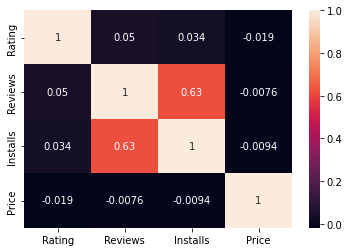

In [136]:
sns.heatmap(ps_df.corr(), annot= True)

We observe that there is a strong correlation between the reviews and installs. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.

1. Lets find the percent of apps that are free

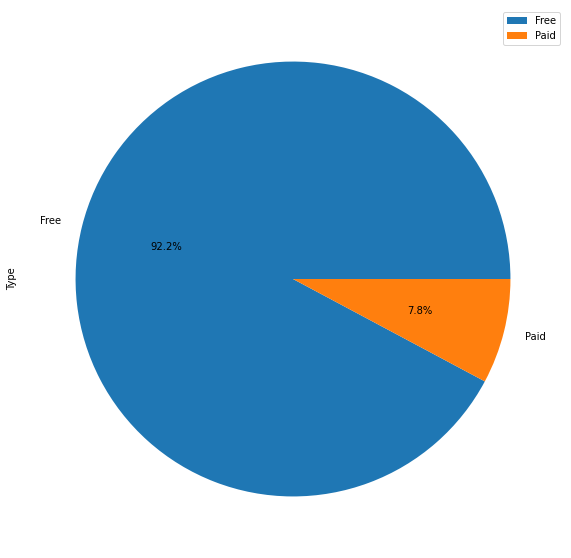

In [182]:
ps_df['Type'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

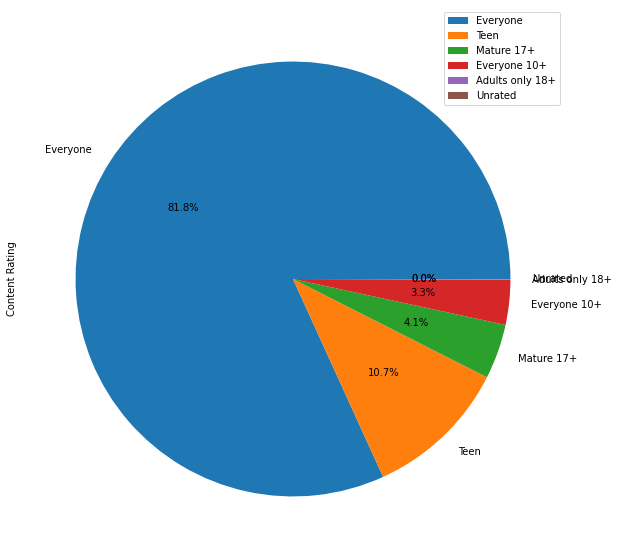

In [185]:
ps_df['Content Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

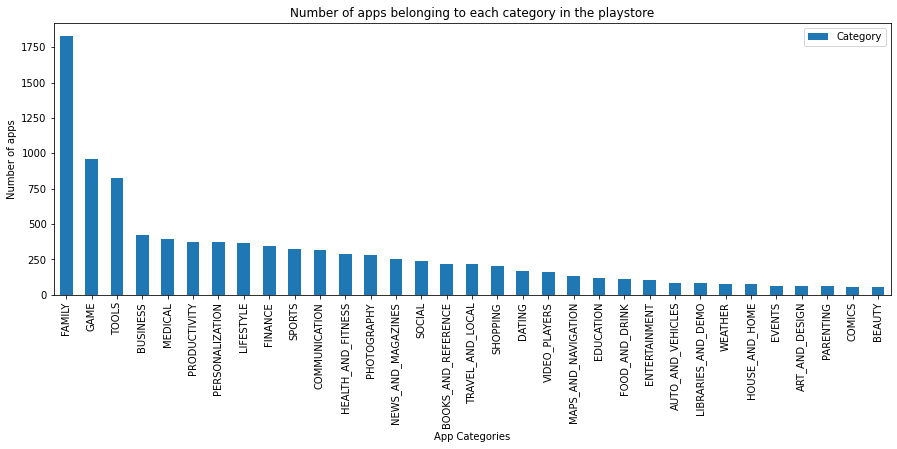

In [195]:
ps_df['Category'].value_counts().plot.bar(figsize=(15,5) )
plt.xlabel('App Categories')
plt.ylabel('Number of apps')
plt.title('Number of apps belonging to each category in the playstore')
plt.legend()

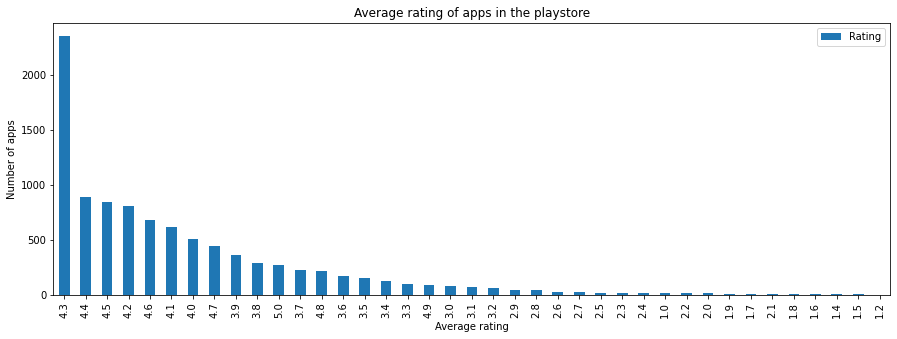

In [196]:
ps_df['Rating'].value_counts().plot.bar(figsize=(15,5) )
plt.xlabel('Average rating')
plt.ylabel('Number of apps')
plt.title('Average rating of apps in the playstore')
plt.legend()